<a href="https://colab.research.google.com/github/denbush03/basketshopgithub.io/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_5%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Данные о ресторанах и потребителях

Данные взяты: https://archive.ics.uci.edu/ml/datasets/Restaurant+%26+consumer+data

#1. Импорт нужных библиотек и подключение к диску




In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
from functools import reduce
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import xgboost
import os


Подключение к диску 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Импорт данных

Файлы, экземпляры и атрибуты
Количество файлов: 9

Рестораны
1 chefmozaccepts.csv
2 chefmozcuisine.csv
3 chefmozhours4.csv
4 chefmozparking.csv
5 геопространств2.csv

Потребители
6 usercuisine.csv
7 userpayment.csv
8 userprofile.csv

Пользователь-Элемент-Рейтинг
9 rating_final.csv

- 1 chefmozaccepts.csv
Экземпляров: 1314
Атрибуты: 2
placeID: идентификатор места 
Rpayment: способ оплаты 

- 2 chefmozcuisine.csv
Экземпляров: 916
Атрибуты: 2
placeID: идентификатор места 
Rcuisine: Кухня

- 3 chefmozhours4.csv
Экземпляров: 2339
Атрибуты: 3
placeID: идентификатор места 
hours: Номинальные, Диапазон:00:00-23:30
days:Номинальные, 7 [Пн;Вт;Ср;Чт;Пт;Сб;Вс]

- 4 chefmozparking.csv
Экземпляров: 702
Атрибуты: 2
placeId: Номинальный
parking_lot:Номинальный, наличие парковки

- 5 геопространств2.csv
Экземпляров: 130
Атрибуты: 21
placeID: идентификатор места 
latitude: широта
longitude: долгота
the_geom_meter: Номинальный (Геопространственный)
name: Нфзвание 
address: адресс 
city: город
state: штат
country: страна 
fax:номер факса 
zip: Nominal,Missing: 74
alcohol: наличие бара с алкоголем
smoking_area: наличие места для курения 
dress_code:	наличие дресс кода 
accessibility: доступность 
price: ценовой сегмент заведения 
url: ссылка на сайт
Rambience: тип заведения
franchise: франшиза 
area: открыто или закрыто 
other_services:	наличие другого сервиса 

- 6 рейтинг_финал.csv
Экземпляров: 1161
Атрибуты: 5
userID:Идентификатор пользователя
placeID: идентификатор места 
rating: рейтинг заведения 
food_rating: рейтинг еды 
service_rating: рейтинг обслуживания 

- 7 usercuisine.csv
Экземпляров: 330
Атрибуты: 2
userID:Идентификатор пользователя
Rcuisine: Кухня

- 8 userpayment.csv
Экземпляров: 177
Атрибуты: 2
userID:Идентификатор пользователя
Upayment: чем принимают оплату 

- 9 профиль пользователя
Экземпляров: 138
Атрибуты: 19
userID:Идентификатор пользователя 
latitude: широта клиента 
longitude: долгота клиента 
the_geom_meter: Номинальный (Геопространственный)
smoker: отношение к курению клиента 
drink_level: отношение к алкоголю клиента 
dress_preference: отношение к дресс коду клиента 
ambience: круг общения клиента 
transport: наличие транспорта клиента 
marital_status:	семейное положение клиента 
hijos: заинтересованность клиента 
birth_year:	возраст клиента 
interest: интересы клиента 
personality: заинтересованность клиента 
religion:вероисповедание клиента 
activity: активность 
color: цвет клиента
weight: вес клиента 
budget: бюджет клиента 
height: рост клиента 

In [3]:
accepts = pd.read_csv('/content/drive/MyDrive/5lab/chefmozaccepts.csv')
cuisine = pd.read_csv('/content/drive/MyDrive/5lab/chefmozcuisine.csv')
hours = pd.read_csv('/content/drive/MyDrive/5lab/chefmozhours4.csv')
parking = pd.read_csv('/content/drive/MyDrive/5lab/chefmozparking.csv')
geo = pd.read_csv('/content/drive/MyDrive/5lab/geoplaces2.csv - geoplaces2.csv') 
usercuisine = pd.read_csv('/content/drive/MyDrive/5lab/usercuisine.csv')
payment = pd.read_csv('/content/drive/MyDrive/5lab/userpayment.csv')
profile = pd.read_csv('/content/drive/MyDrive/5lab/userprofile.csv')
rating = pd.read_csv('/content/drive/MyDrive/5lab/rating_final.csv')

#2. Предварительная Обработка Данных


Давайте сначала проверим каждый из этих фреймов данных

In [4]:
accepts.head()

,placeID,Rpayment
0,135110,cash
1,135110,VISA
2,135110,MasterCard-Eurocard
3,135110,American_Express
4,135110,bank_debit_cards


Text(0, 0.5, 'Колличество ')

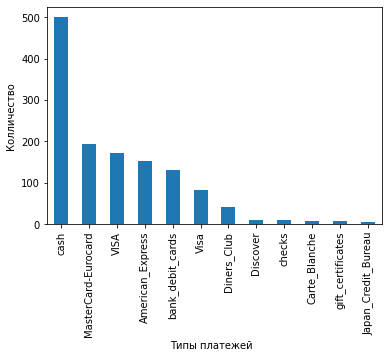

In [5]:
accepts.Rpayment.value_counts().plot(kind='bar')
plt.xlabel('Типы платежей  ')
plt.ylabel('Колличество ')


График количества принятых типов платежей во всех ресторанах


Интересное наблюдение заключается в том, что в большинстве заведений принимаются наличные. Еще одна вещь, на которую следует обратить внимание, - это то, что "VISA" и "visa" - это разные значения, и кажется, что это может быть просто ошибка

In [6]:
print(accepts.Rpayment.unique())

['cash' 'VISA' 'MasterCard-Eurocard' 'American_Express' 'bank_debit_cards'
 'checks' 'Discover' 'Carte_Blanche' 'Diners_Club' 'Visa'
 'Japan_Credit_Bureau' 'gift_certificates']


In [7]:
cuisine.head()

,placeID,Rcuisine
0,135110,Spanish
1,135109,Italian
2,135107,Latin_American
3,135106,Mexican
4,135105,Fast_Food


Text(0, 0.5, 'Виды кухонь ')

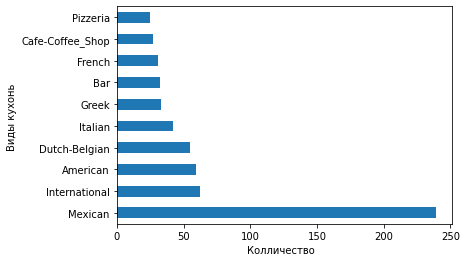

In [8]:
cusines = cuisine.Rcuisine.value_counts()[:10] 
cusines.plot.barh()
plt.xlabel('Колличество  ')
plt.ylabel('Виды кухонь ')



График топ 10 кухонь во всех ресторанах 

In [9]:
print(cuisine.Rcuisine.unique())

['Spanish' 'Italian' 'Latin_American' 'Mexican' 'Fast_Food' 'Burgers'
 'Dessert-Ice_Cream' 'Hot_Dogs' 'Steaks' 'Asian' 'International'
 'Mongolian' 'Vegetarian' 'Brazilian' 'Cafe-Coffee_Shop' 'Cafeteria'
 'Contemporary' 'Deli-Sandwiches' 'Diner' 'Japanese' 'Sushi' 'Seafood'
 'Chinese' 'Bar' 'Bar_Pub_Brewery' 'Pizzeria' 'Mediterranean' 'American'
 'Family' 'Caribbean' 'African' 'Breakfast-Brunch' 'Regional' 'Afghan'
 'Bakery' 'Game' 'Armenian' 'Vietnamese' 'Korean' 'Thai' 'Barbecue'
 'Polish' 'Dutch-Belgian' 'French' 'German' 'Southwestern' 'Persian'
 'Ethiopian' 'Juice' 'Soup' 'Continental-European' 'Greek' 'Southern'
 'Eastern_European' 'California' 'Bagels' 'Turkish' 'Organic-Healthy'
 'Fine_Dining']


In [10]:
hours.head()

,placeID,hours,days
0,135111,00:00-23:30;,Mon;Tue;Wed;Thu;Fri;
1,135111,00:00-23:30;,Sat;
2,135111,00:00-23:30;,Sun;
3,135110,08:00-19:00;,Mon;Tue;Wed;Thu;Fri;
4,135110,00:00-00:00;,Sat;


Text(0, 0.5, 'колличество ')

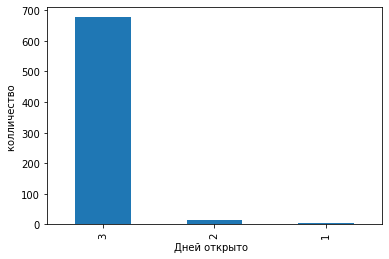

In [11]:

hours.groupby('placeID').agg({'days': pd.Series.nunique}).days.value_counts().plot.bar();
plt.xlabel('Дней открыто  ')
plt.ylabel('колличество ')


График количества дней, открытых всех ресторанов

In [12]:
parking.head()

,placeID,parking_lot
0,135111,public
1,135110,none
2,135109,none
3,135108,none
4,135107,none


Text(0, 0.5, 'Наличие парковочных мест')

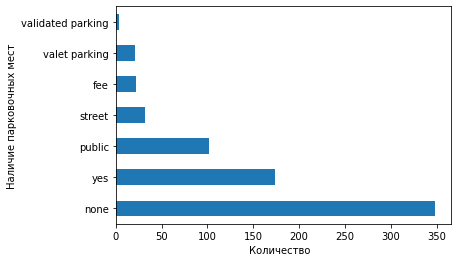

In [13]:
parking.parking_lot.value_counts().plot.barh();
plt.xlabel('Количество  ')
plt.ylabel('Наличие парковочных мест')

график количества парковочных мест во всех ресторанах

In [14]:
print(parking.parking_lot.unique())

['public' 'none' 'yes' 'valet parking' 'fee' 'street' 'validated parking']


In [15]:
geo.head()

,placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,NaN,...,No_Alcohol_Served,none,informal,no_accessibility,medium,kikucuernavaca.com.mx,familiar,f,closed,none
1,132825,22.147392,-100.983092,0101000020957F00001AD016568C4858C1243261274BA5...,puesto de tacos,esquina santos degollado y leon guzman,s.l.p.,s.l.p.,mexico,NaN,...,No_Alcohol_Served,none,informal,completely,low,NaN,familiar,f,open,none
2,135106,22.149709,-100.976093,0101000020957F0000649D6F21634858C119AE9BF528A3...,El Rincón de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,NaN,...,Wine-Beer,only at bar,informal,partially,medium,NaN,familiar,f,open,none
3,132667,23.752697,-99.163359,0101000020957F00005D67BCDDED8157C1222A2DC8D84D...,little pizza Emilio Portes Gil,calle emilio portes gil,victoria,tamaulipas,NaN,NaN,...,No_Alcohol_Served,none,informal,completely,low,NaN,familiar,t,closed,none
4,132613,23.752903,-99.165076,0101000020957F00008EBA2D06DC8157C194E03B7B504E...,carnitas_mata,lic. Emilio portes gil,victoria,Tamaulipas,Mexico,NaN,...,No_Alcohol_Served,permitted,informal,completely,medium,NaN,familiar,t,closed,none


In [16]:
usercuisine.head()

,userID,Rcuisine
0,U1001,American
1,U1002,Mexican
2,U1003,Mexican
3,U1004,Bakery
4,U1004,Breakfast-Brunch


Text(0, 0.5, 'количество')

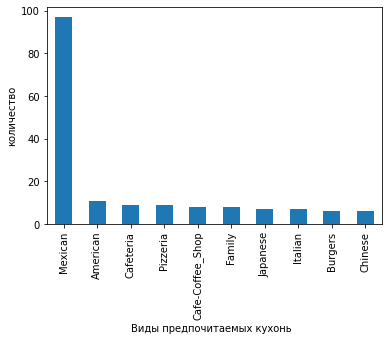

In [17]:


usercuisine.Rcuisine.value_counts()[:10].plot.bar();
plt.xlabel('Виды предпочитаемых кухонь  ')
plt.ylabel('количество')

график количества различных кухонь, предпочитаемых всеми клиентами

In [18]:
print(usercuisine.Rcuisine.unique())

['American' 'Mexican' 'Bakery' 'Breakfast-Brunch' 'Japanese'
 'Contemporary' 'Bagels' 'Cafe-Coffee_Shop' 'Continental-European'
 'Cafeteria' 'Family' 'Juice' 'Hawaiian' 'Hot_Dogs' 'Latin_American'
 'Korean' 'Italian' 'Diner' 'Fast_Food' 'Deli-Sandwiches' 'Regional'
 'Fusion' 'Portuguese' 'Indian-Pakistani' 'Eastern_European' 'Lebanese'
 'Moroccan' 'Barbecue' 'Polynesian' 'Polish' 'Chinese' 'Pizzeria'
 'Burgers' 'Afghan' 'Middle_Eastern' 'Mongolian' 'Bar' 'Cuban' 'Tex-Mex'
 'Spanish' 'Soup' 'Sushi' 'Game' 'Doughnuts' 'Australian' 'Asian'
 'Dessert-Ice_Cream' 'Seafood' 'Turkish' 'Organic-Healthy' 'Steaks'
 'Mediterranean' 'British' 'Austrian' 'Israeli' 'Russian-Ukrainian'
 'Malaysian' 'Vegetarian' 'Peruvian' 'Tapas' 'Eclectic' 'African' 'Basque'
 'Canadian' 'Irish' 'Southwestern' 'Tea_House' 'International'
 'Pacific_Northwest' 'German' 'Persian' 'Ethiopian' 'Romanian' 'Cambodian'
 'Pacific_Rim' 'Tunisian' 'Filipino' 'Dim_Sum' 'Greek' 'Thai' 'Swiss'
 'Cajun-Creole' 'Armenian' 'Indigenous

In [19]:
payment.head()

,userID,Upayment
0,U1001,cash
1,U1002,cash
2,U1003,cash
3,U1004,cash
4,U1004,bank_debit_cards


Text(0, 0.5, 'количество')

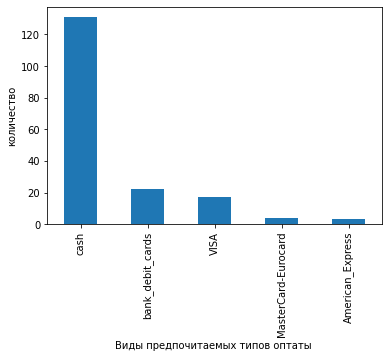

In [20]:
payment.Upayment.value_counts().plot(kind='bar')
plt.xlabel('Виды предпочитаемых типов оптаты ')
plt.ylabel('количество')

график количества способов оплаты, предпочитаемых всеми Клиентами

In [21]:
print(payment.Upayment.unique())

['cash' 'bank_debit_cards' 'MasterCard-Eurocard' 'VISA' 'American_Express']


In [22]:
profile.head()

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53
4,U1005,22.183477,-100.959891,false,abstemious,no preference,family,public,single,independent,1992,none,thrifty-protector,Catholic,student,black,65,medium,1.69


In [23]:
rating.head()


,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


Text(0, 0.5, 'Колличество ')

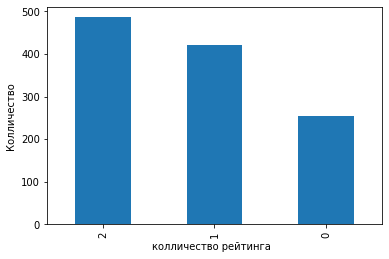

In [24]:
rating.rating.value_counts().plot.bar()
plt.xlabel('колличество рейтинга  ')
plt.ylabel('Колличество ')

график Подсчета Общего рейтинга

In [25]:
rating.iloc[:,2:].describe()

,rating,food_rating,service_rating
count,1161.000000,1161.000000,1161.000000
mean,1.199828,1.215332,1.090439
std,0.773282,0.792294,0.790844
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000
max,2.000000,2.000000,2.000000


Теперь давайте посмотрим, сколько всего ресторанов и пользователей

In [26]:
res_all = np.concatenate((accepts.placeID.unique(), cuisine.placeID.unique(), 
                          hours.placeID.unique(), parking.placeID.unique(), geo.placeID.unique()))
res_all = np.sort( np.unique(res_all) ) 

print("Всего {} ресторанов.".format(len(res_all)))

Всего 938 ресторанов.


In [27]:
user_all = np.concatenate((usercuisine.userID.unique(), payment.userID.unique(), 
                           profile.userID.unique()))
user_all = np.sort( np.unique(user_all) ) 

print("Всего {} пользователей.".format(len(user_all)))

Всего 138 пользователей.


Теперь создвдим три фрейма данных для трех типов рейтинга, каждый из которых будет иметь форму (938, 138). Пара ресторан-пользователь без рейтинга будет записана как -1 (чтобы отличаться от 0, самый низкий рейтинг).

In [28]:
overall_rating = pd.DataFrame( np.zeros((len(res_all),len(user_all)))-1.0, 
                              columns=user_all, index=res_all )
food_rating = overall_rating.copy()
service_rating = overall_rating.copy() 

for r, u, o, f, s in zip(rating.placeID, rating.userID, rating.rating, rating.food_rating, 
                         rating.service_rating):
    overall_rating.loc[r,u] = o
    food_rating.loc[r,u] = f
    service_rating.loc[r,u] = s

Следующий фрейм данных сообщает нам, имеет ли пара ресторан-пользователь рейтинг. 0 - "Нет", а 1 - "Да"

In [29]:
review = pd.DataFrame( np.zeros(overall_rating.shape), columns=user_all, index=res_all)
review[overall_rating >= 0] = 1

Объединим информацию о ресторанах и создам фрейм данных для их функций. И пока пропустим "accepts" и "hours", потому что они не должны быть важны для моделирования

 удалим дубликаты идентификаторов ресторанов. 
 Ресторан с несколькими категориями кухни будет иметь несколько столбцов, равных 1

In [30]:

res_cuisine = pd.get_dummies(cuisine,columns=['Rcuisine'])


res_cuisine = res_cuisine.groupby('placeID',as_index=False).sum()

res_cuisine.head()

,placeID,Rcuisine_Afghan,Rcuisine_African,Rcuisine_American,Rcuisine_Armenian,Rcuisine_Asian,Rcuisine_Bagels,Rcuisine_Bakery,Rcuisine_Bar,Rcuisine_Bar_Pub_Brewery,...,Rcuisine_Soup,Rcuisine_Southern,Rcuisine_Southwestern,Rcuisine_Spanish,Rcuisine_Steaks,Rcuisine_Sushi,Rcuisine_Thai,Rcuisine_Turkish,Rcuisine_Vegetarian,Rcuisine_Vietnamese
0,132001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,132002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,132003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,132004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,132005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Для человека, у которого есть автомобиль, имеет значение, есть ли в ресторане парковка, и это может повлиять на то, какую оценку он / она даст. Здесь группируем исходные варианты парковки только по трем категориям (от лучшего к худшему): бесплатная парковка ресторана (2 балла), другие виды парковки (1 балл) и отсутствие парковки (0 баллов)

In [31]:
parking.parking_lot.value_counts()

none                 348
yes                  174
public               102
street                32
fee                   22
valet parking         21
validated parking      3
Name: parking_lot, dtype: int64

удалим дубликаты идентификаторов ресторана. 
 Ресторан с несколькими вариантами парковки может иметь значение > 2

In [32]:
res_parking = parking.copy()
res_parking.parking_lot = res_parking.parking_lot.map({'fee':1, 'none':0, 'public':1, 'yes':2,
                                        'street':1, 'valet parking':1, 'validated parking':1})


res_parking = res_parking.groupby('placeID',as_index=False).sum()

Местоположения полезны при составлении рекомендаций, поэтому я сохраняю их во фрейме данных "res_info".

 Эти функции должны иметь отношение к прогнозированию рейтинга, поскольку они касаются услуг 
и цена. В частности, "alcohol", "smoking_area" и "price" относятся к "drink_level", 
"smoker" и "budget" в профилях пользователей 

In [33]:
res_info = geo[['latitude','longitude','placeID','name','address','city','state']]


res_service_price = geo[['placeID','alcohol','smoking_area','other_services','price']]
print(res_service_price.alcohol.value_counts())
print('\n')
print(res_service_price.smoking_area.value_counts())
print('\n')
print(res_service_price.other_services.value_counts())
print('\n')
print(res_service_price.price.value_counts())

No_Alcohol_Served    87
Wine-Beer            34
Full_Bar              9
Name: alcohol, dtype: int64


none             70
not permitted    25
section          24
permitted         9
only at bar       2
Name: smoking_area, dtype: int64


none        119
variety       7
Internet      4
Name: other_services, dtype: int64


medium    60
low       45
high      25
Name: price, dtype: int64


 1, если алкоголь доступен, 0 в противном случае

In [34]:

res_service_price.alcohol = res_service_price.alcohol.map(lambda x: 0 if x == 'No_Alcohol_Served' else 1)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


 1, если есть место для курения, 0 в противном случае

In [35]:
res_service_price.smoking_area = res_service_price.smoking_area.map(lambda x: 0 if (x == 'none') | (x == 'not permitted') else 1)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


 1, если доступны другие услуги, 0 в противном случае

In [36]:
res_service_price.other_services = res_service_price.other_services.map(lambda x: 0 if x == 'none'  else 1)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


 сопоставление уровней цен с цифрами

In [37]:
res_service_price.price = res_service_price.price.map({'low': 1, 'medium': 2, 'high': 3})

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [38]:

res_environment = geo[['placeID','dress_code','accessibility','Rambience','area']]
print(res_environment.dress_code.value_counts())
print('\n')
print(res_environment.accessibility.value_counts())
print('\n')
print(res_environment.Rambience.value_counts())
print('\n')
print(res_environment.area.value_counts())

informal    118
casual       10
formal        2
Name: dress_code, dtype: int64


no_accessibility    76
completely          45
partially            9
Name: accessibility, dtype: int64


familiar    121
quiet         9
Name: Rambience, dtype: int64


closed    115
open       15
Name: area, dtype: int64


1, если требуется официальная одежда, 0 в противном случае

In [39]:
res_environment.dress_code = res_environment.dress_code.map({'informal':0, 'casual':0, 'formal': 1})

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


сопоставим уровни доступности с числами

In [40]:
res_environment.accessibility = res_environment.accessibility.map({'no_accessibility':0, 'partially':1, 'completely': 2})
res_environment.Rambience = res_environment.Rambience.map({'familiar':0, 'quiet': 1})
res_environment.area = res_environment.area.map({'open':0, 'closed':1})

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value



Теперь объединим информацию о ресторане в один фрейм данных

In [41]:
df_res = pd.DataFrame({'placeID': res_all})
df_res = pd.merge(left=df_res, right=res_cuisine, how="left", on="placeID")
df_res = pd.merge(left=df_res, right=res_parking, how="left", on="placeID")
df_res = pd.merge(left=df_res, right=res_service_price, how="left", on="placeID")
df_res = pd.merge(left=df_res, right=res_environment, how="left", on="placeID")

print(df_res.shape)
df_res.head()

(938, 69)


,placeID,Rcuisine_Afghan,Rcuisine_African,Rcuisine_American,Rcuisine_Armenian,Rcuisine_Asian,Rcuisine_Bagels,Rcuisine_Bakery,Rcuisine_Bar,Rcuisine_Bar_Pub_Brewery,...,Rcuisine_Vietnamese,parking_lot,alcohol,smoking_area,other_services,price,dress_code,accessibility,Rambience,area
0,132001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,132002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,132003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,132004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,132005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Список мест для 130 ресторанов с рейтингами

In [42]:
res_rated = res_all[np.sum(review,axis=1) > 0] 

сообщает нам, имеет ли пара ресторан-пользователь рейтинг. 0 означает "Нет", а 1 означает "Да".

In [43]:

R = review.loc[res_rated].values  

Y_service = service_rating.loc[res_rated].values
Y_overall = overall_rating.loc[res_rated].values
Y_food  = food_rating.loc[res_rated].values

In [44]:


index = np.array([x in res_rated for x in df_res['placeID'].values])
index = np.where(index == True)[0]

X = df_res.loc[index, :].reset_index(drop=True)

заполните все NAN-адреса 0.

удалить объект, если весь столбец равен 0

In [45]:
X = X.fillna(0) 
features_to_drop = X.columns.values[np.sum(X,axis=0) == 0] 
X = X.drop(features_to_drop, axis=1)
X = X.drop(['placeID'], axis=1)
X.head()

,Rcuisine_American,Rcuisine_Armenian,Rcuisine_Bakery,Rcuisine_Bar,Rcuisine_Bar_Pub_Brewery,Rcuisine_Breakfast-Brunch,Rcuisine_Burgers,Rcuisine_Cafe-Coffee_Shop,Rcuisine_Cafeteria,Rcuisine_Chinese,...,Rcuisine_Vietnamese,parking_lot,alcohol,smoking_area,other_services,price,dress_code,accessibility,Rambience,area
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


# Моделирование

В дальнейшем я буду использовать только 'parking_lot', 'alcohol','smoking_area','other_services', 'price', 'dress_code' и 'accessibility'. 

In [46]:
X = X[['parking_lot','alcohol','smoking_area','other_services','price','dress_code','accessibility']]
X['x0'] = 1 
X.head()

,parking_lot,alcohol,smoking_area,other_services,price,dress_code,accessibility,x0
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1
2,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1
3,2.0,0.0,0.0,0.0,1.0,0.0,2.0,1
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1


Прежде чем мы внедрим модели, давайте разделим существующие рейтинги на обучающий набор и набор проверки. Я буду использовать разделение 80/25.  Разделяются экземпляры рейтинга, а не примеры ресторанов или пользователей. Вместо того, чтобы просто случайным образом разбивать данные, я гарантирую, что каждый ресторан и каждый потребитель получат / дадут некоторые оценки в обучающем наборе. Это ограничение гарантирует, что характеристики каждого ресторана и потребителя будут изучены.

 количество оценок от каждого пользователя (минимум = 3)
 
 20% существующих рейтингов будут использоваться в качестве набора для проверки
Таким образом, во время тренировки они будут помечены

In [47]:
num_rating = np.round(np.sum(R,axis=0)) 


g = lambda x: int(round(x*0.2)) 
flag = np.array( [g(x) for x in num_rating] )

random.seed(0)
cond = True

while cond:

    R_train = R.copy()

    # цикл по каждому пользователю
    for i in range(R_train.shape[1]):
        
        index = list( np.where(R_train[:,i] == 1)[0] )  
        
        index_flag = random.sample(index,flag[i])
        R_train[index_flag,i] = 0  
    
    
    if (np.sum(R_train,axis=0).min() > 1) & (np.sum(R_train,axis=1).min() > 1.2): 
        cond = False
        
R_valid = R - R_train 

print(R_train.sum())
print(R_valid.sum())


920.0
241.0


Теперь "R_train" содержит 920 единиц, а "R_valid" содержит 241 единиц ("R" содержит 1161 единицу)

Форма "R", "R_train" и "R_valid" - это все (130,138) 

# Показатели оценки
Я буду использовать две оценочные метрики для количественной оценки характеристик модели. Первый из них - ошибка среднеквадратичного значения (RMSE), которая является очень стандартной для задач регрессии, поскольку она сообщает вам, насколько близки ваши прогнозы к меткам. Однако для рекомендательных систем самое важное - это ранги продуктов, и RMSE иногда не подходит для этой цели. Например, прогноз с идеальным рейтингом может иметь ужасный RMSE, если прогнозировать рейтинги по неправильной шкале.

Таким образом, вторая метрика, которую я буду использовать, - это Доля согласующихся пар (FCP).

In [48]:
def FCP(Y,Y_pred,R):
    
    
    Y_fcp = []  
    Y_pred_fcp = [] # список прогнозируемых оценок от каждого пользователя
    n_user = R.shape[1]
    
    for i in range(n_user):
        
        cond = (R.sum(axis=0) >= 2)[i] # от пользователя должно быть не менее двух оценок
        index = np.where( R[:,i] == 1)[0] # индексы (рестораны) с рейтингами
    
        if cond:
            
            Y_fcp.append( (Y*R)[:,i][index] )
            Y_pred_fcp.append( (Y_pred*R)[:,i][index] )

        
    n_fcp = len(Y_fcp) # количество пользователей с не менее чем двумя рейтингами
    TP = 0. # Общее количество пар
    DP = 0. # количество диссонирующих пар
    CP = 0.  # количество совпадающих пар (исключая связи)
    
    for i in range(n_fcp):
        
        num_Y = len(Y_fcp[i])   
        TP += num_Y*(num_Y-1)/2 

        greater = np.array([])
        greater_pred = np.array([])

        # этот цикл предназначен для просмотра всех рейтинговых пар
        for j in range(num_Y-1):
            
            not_equal = Y_fcp[i][j] != Y_fcp[i][j+1:]
            greater = Y_fcp[i][j] > Y_fcp[i][j+1:]
            greater_pred = Y_pred_fcp[i][j] > Y_pred_fcp[i][j+1:]

            # отфильтрует те, которые не являются связями
            greater = greater[not_equal]
            greater_pred = greater_pred[not_equal]

            DP += (greater != greater_pred).sum()
            CP += (greater == greater_pred).sum()
            
    print("Общее количество рейтинговых пар: {}".format(int(TP)))
    print("Общее количество диссонирующих пар: {}".format(int(DP)))
    print("Общее количество совпадающих пар: {}".format(int(CP)))
    print("Общее количество связей: {}".format(int(TP-DP-CP)))
    print("FCP: {}".format(CP/(CP+DP)))

In [49]:
def get_rmse(Y,Y_pred):
  return np.sqrt(mean_squared_error(Y, Y_pred))

# Эталонная модель

Эта модель просто вычисляет средний рейтинг каждого ресторана.

In [50]:
def GetMean(Y,R):

    Y = Y*R
    mean =  (np.sum(Y, axis=1)/np.sum((R == 1.0), axis=1)).reshape(Y.shape[0],1) * np.ones(Y.shape)
    return mean

In [53]:
Y = Y_overall 
Y_mean = GetMean(Y,R_train) # получить средние оценки на основе тренировочного набора
Y_pred = np.zeros(Y.shape) + Y_mean # предсказание
b_rmse = get_rmse(Y[R_valid == 1], Y_pred[R_valid == 1])
# RMSE
print("RMSE of the training set: {}".format(get_rmse(Y[R_train == 1], Y_pred[R_train == 1])))
print("RMSE of the validation set: {}".format(get_rmse(Y[R_valid == 1], Y_pred[R_valid == 1])))

RMSE of the training set: 0.7025788790180052
RMSE of the validation set: 0.8024733224208809


In [54]:
print("Training Set:")
FCP(Y,Y_pred,R_train)
print("\n")
print("Validation Set:")
FCP(Y,Y_pred,R_valid)

Training Set:
Общее количество рейтинговых пар: 3130
Общее количество диссонирующих пар: 417
Общее количество совпадающих пар: 973
Общее количество связей: 1740
FCP: 0.7


Validation Set:
Общее количество рейтинговых пар: 121
Общее количество диссонирующих пар: 25
Общее количество совпадающих пар: 25
Общее количество связей: 71
FCP: 0.5


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


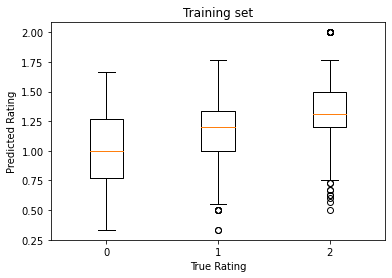

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


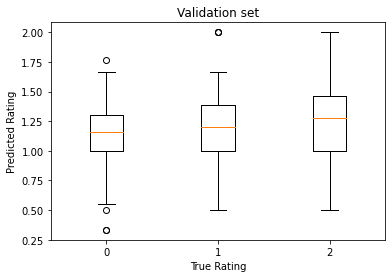

In [55]:
def MakeBoxplot(Y_pred, Y_true, R, title):
    
    data1 = Y_pred[R == 1][Y_true[R == 1] == 0]
    data2 = Y_pred[R == 1][Y_true[R == 1] == 1]
    data3 = Y_pred[R == 1][Y_true[R == 1] == 2]
    data = [data1,data2,data3]

    fig = plt.figure()
    plt.boxplot(data)
    plt.xticks([1, 2, 3],[0,1,2])
    plt.xlabel('True Rating')
    plt.ylabel('Predicted Rating')
    plt.title(title)
    plt.show()
MakeBoxplot(Y_pred, Y, R_train, 'Training set')
MakeBoxplot(Y_pred, Y, R_valid, 'Validation set')

# Модель основанная на данных 1

Давайте сначала реализуем функцию стоимости и градиент ее параметров используя матричную факторизацию

Параметры функции затрат представляют собой веса всех пользователей с формой =
(n_user, n_feature), где n_user = 138 = количество пользователей, а n_feature = 8 = количество
Количество функций ресторана (включая термин смещения). Однако для обеспечения функции затрат
для функции SciPy minimize() параметры функции не могут быть матрицей и должны быть
1D вектор

In [56]:


def CostFunction(params, X, Y, R, lambd): 
    
    num_user = R.shape[1]
    num_feature = X.shape[1]

    
    Theta = params.reshape(num_user, num_feature)
    J = 0.5 * np.sum( (np.dot(X, Theta.T) * R - Y)**2 )

    J = J + lambd/2. * np.sum(Theta[:,:-1]**2) 

    return J


def Gradient(params, X, Y, R, lambd):
    
    num_user = R.shape[1]
    num_feature = X.shape[1]

    Theta = params.reshape(num_user, num_feature)
    Theta_grad = np.dot((np.dot(Theta, X.T) * R.T - Y.T), X)

    
    Theta_grad[:,:-1] = Theta_grad[:,:-1] + lambd*Theta[:,:-1]

    return Theta_grad.reshape(-1)

In [57]:
def MeanNorm(Y,R):
    
    Y_norm = Y*R
    mean =  (np.sum(Y_norm, axis=1)/np.sum((R == 1.0), axis=1)).reshape(Y.shape[0],1) * np.ones(Y.shape)
    Y_norm = (Y_norm - mean)*R

    return Y_norm, mean

L2; Я несколько раз выполнял оптимизацию с разными значениями 
            (1, 2, 4, 8...) и 32 результат дают наилучший результат проверки FCP

In [58]:
Y_norm, Y_mean = MeanNorm(Y,R_train)

n_user = R.shape[1]
n_feature = X.shape[1]
lambd = 128.  
    
Theta = np.random.normal(0,1,(n_user, n_feature)).reshape(-1) 

result = minimize(CostFunction, Theta, jac=Gradient, args=(X, Y_norm, R_train, lambd),
                  options={'disp': True, 'maxiter': 500})

Optimization terminated successfully.
         Current function value: 116.801977
         Iterations: 258
         Function evaluations: 357
         Gradient evaluations: 357


In [59]:
Theta_opt = result.x.reshape(n_user, n_feature) 
Y_pred = np.dot(X, Theta_opt.T) + Y_mean
print("RMSE of the training set: {}".format(np.sqrt(mean_squared_error(Y[R_train == 1], Y_pred[R_train == 1]))))
print("RMSE of the validation set: {}".format(np.sqrt(mean_squared_error(Y[R_valid == 1], Y_pred[R_valid == 1]))))

RMSE of the training set: 0.4996571878515291
RMSE of the validation set: 0.6693746478806423


In [60]:
print("Training Set:")
FCP(Y,Y_pred,R_train)
print("\n")
print("Validation Set:")
FCP(Y,Y_pred,R_valid)

Training Set:
Общее количество рейтинговых пар: 3130
Общее количество диссонирующих пар: 393
Общее количество совпадающих пар: 997
Общее количество связей: 1740
FCP: 0.7172661870503597


Validation Set:
Общее количество рейтинговых пар: 121
Общее количество диссонирующих пар: 26
Общее количество совпадающих пар: 24
Общее количество связей: 71
FCP: 0.48


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


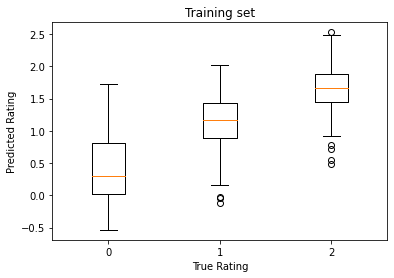

In [61]:
MakeBoxplot(Y_pred, Y, R_train, 'Training set')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


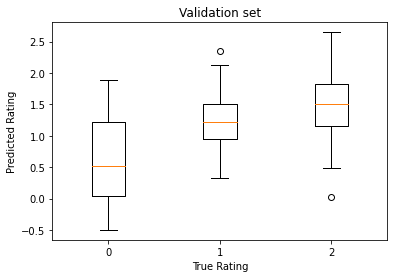

In [62]:
MakeBoxplot(Y_pred, Y, R_valid, 'Validation set')

#Модель основанная на данных 2

Для этой модели я буду учитывать информацию о пользователе, которая связана с некоторыми функциями ресторана, а именно: "smoker", "drink_level", "transport", "budget". Давайте сначала обработаем пользовательские данные.

In [63]:
user_info = profile[['smoker','drink_level','transport','budget']]

print(user_info.smoker.value_counts())
print('\n')
print(user_info.drink_level.value_counts())
print('\n')
print(user_info.transport.value_counts())
print('\n')
print(user_info.budget.value_counts())

false    109
true      26
?          3
Name: smoker, dtype: int64


abstemious        51
casual drinker    47
social drinker    40
Name: drink_level, dtype: int64


public       82
car owner    35
on foot      14
?             7
Name: transport, dtype: int64


medium    91
low       35
?          7
high       5
Name: budget, dtype: int64


 1 для курильщиков, в противном случае 0; предположим, что "?" - это некурящие.

In [64]:
user_info.smoker = user_info.smoker.map({'false': 0, 'true': 1, '?': 0})

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


сопоставим уровни питья с цифрами

In [65]:


user_info.drink_level = user_info.drink_level.map({'abstemious': 1, 'casual drinker': 2, 'social drinker': 3})

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


1 для владельцев автомобилей, в противном случае 0; предположим, что "?" не являются владельцами автомобилей

In [66]:
user_info.transport = user_info.transport.map({'public':0, 'car owner':1, 'on foot':0, '?':0})

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value



сопоставим уровни бюджета с цифрами; предположим, что "?" - средний

In [67]:


user_info.budget = user_info.budget.map({'medium':2, 'low':1, 'high':3, '?':2})

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [68]:
user_info.head()

,smoker,drink_level,transport,budget
0,0,1,0,2
1,0,1,0,1
2,0,3,0,1
3,0,1,0,2
4,0,1,0,2


Здесь я создаю матрицу "Theta_modifier" с формой = (n_user, n_feature), чтобы настроить функции ресторана, которые видят пользователи. Большинство элементов в этой матрице являются единицами, за исключением тех, которые соответствуют 'parking_lot', 'smoking_area', 'alcohol' и 'price':
(1) Если у пользователя нет автомобиля, ему / ей будет все равно, есть ли парковка, и соответствующий вес для "parking_lot" не нужен.
(2) Если пользователь не курит, ему / ей будет все равно, есть ли место для курения, и соответствующий вес для "smoking_area" не нужен.
(3) Пользователи с разным уровнем drink_level по-разному заботятся о том, предоставляется ли алкоголь в ресторане.
(4) Пользователи с разным "бюджетом" по-разному заботятся о цене. Людей с более высоким бюджетом это волнует меньше.

In [69]:
Theta_modifier = pd.DataFrame(np.ones((n_user, n_feature)), columns=X.columns.values) 
Theta_modifier['parking_lot'] = user_info['transport'] # 0 или 1
Theta_modifier['alcohol'] = user_info['drink_level'] # 1, 2 или 3
Theta_modifier['smoking_area'] = user_info['smoker'] # 0 или 1
Theta_modifier['price'] = 1.0/user_info['budget'] # 1 (low), 1/2 (medium) или 1/3 (high)
Theta_modifier = Theta_modifier.values

In [70]:
def CostFunction2(params, X, Y, R, Theta_modifier, lambd):

    num_user = R.shape[1]
    num_feature = X.shape[1]

    
    Theta_temp = Theta_modifier.reshape(-1)
    
    Theta_temp[Theta_temp > 0] = Theta_temp[Theta_temp > 0] * params
    
    
    Theta = Theta_temp.reshape(num_user, num_feature)
    J = 0.5 * np.sum( (np.dot(X, Theta.T) * R - Y)**2 )

    # регуляризация
    J = J + lambd/2. * np.sum(Theta[:,:-1]**2) 

    return J


def Gradient2(params, X, Y, R, Theta_modifier, lambd):

    num_user = R.shape[1]
    num_feature = X.shape[1]

    Theta_temp = Theta_modifier.reshape(-1)
    Theta_temp[Theta_temp > 0] = Theta_temp[Theta_temp > 0] * params

    Theta = Theta_temp.reshape(num_user, num_feature)
    Theta_grad = np.dot((np.dot(Theta, X.T) * R.T - Y.T), X) 

    # регуляризация
    Theta_grad[:,:-1] = Theta_grad[:,:-1] + lambd*Theta[:,:-1]
    Theta_grad = Theta_grad * Theta_modifier

    Theta_grad = Theta_grad[Theta_modifier > 0]

    return Theta_grad

 L2; Я несколько раз выполнял оптимизацию с разными значениями
 (1, 2, 4, 8...) и 32 результата дают наилучший результат проверки FCP

In [71]:
lambd = 32.  
    
Theta = np.random.normal(0,1,(n_user, n_feature))[Theta_modifier > 0] 

result = minimize(CostFunction2, Theta, jac=Gradient2, args=(X, Y_norm, R_train, Theta_modifier, 
                  lambd), options={'disp': True, 'maxiter': 500})

Optimization terminated successfully.
         Current function value: 113.792924
         Iterations: 176
         Function evaluations: 206
         Gradient evaluations: 206


 элементы с ненулевыми значениями в Theta_modifier умножаются на оптимальные веса

In [72]:

Theta_transformer = Theta_modifier.reshape(-1)
Theta_transformer[Theta_transformer > 0] = Theta_transformer[Theta_transformer > 0] * result.x
 
Theta_opt = Theta_transformer.reshape(n_user, n_feature)

Y_pred = np.dot(X, Theta_opt.T) + Y_mean
print("RMSE of the training set: {}".format(np.sqrt(mean_squared_error(Y[R_train == 1], Y_pred[R_train == 1]))))
print("RMSE of the validation set: {}".format(np.sqrt(mean_squared_error(Y[R_valid == 1], Y_pred[R_valid == 1]))))

RMSE of the training set: 0.4877784351329633
RMSE of the validation set: 0.6699725061621488


In [73]:
print("Training Set:")
FCP(Y,Y_pred,R_train)
print("\n")
print("Validation Set:")
FCP(Y,Y_pred,R_valid)

Training Set:
Общее количество рейтинговых пар: 3130
Общее количество диссонирующих пар: 366
Общее количество совпадающих пар: 1024
Общее количество связей: 1740
FCP: 0.7366906474820144


Validation Set:
Общее количество рейтинговых пар: 121
Общее количество диссонирующих пар: 27
Общее количество совпадающих пар: 23
Общее количество связей: 71
FCP: 0.46


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


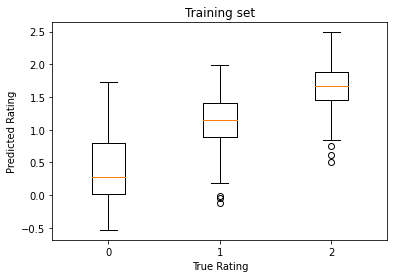

In [74]:
MakeBoxplot(Y_pred, Y, R_train, 'Training set')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


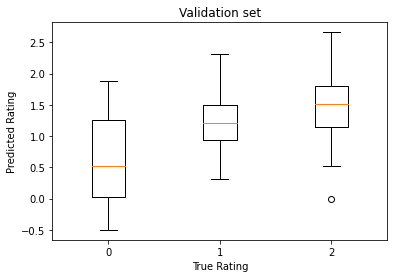

In [75]:
MakeBoxplot(Y_pred, Y, R_valid, 'Validation set')


In [76]:
R_test =  R*(-1) + 1.0 # 1 для тех, у кого нет существующих рейтингов, 0 в противном случае

# прогнозируемые рейтинги ресторанов, которые не посещал каждый пользователь
Y_final = Y_pred * R_test
Y_final = pd.DataFrame( Y_final, columns=user_all, index=res_rated )
Y_final.head()

,U1001,U1002,U1003,U1004,U1005,U1006,U1007,U1008,U1009,U1010,...,U1129,U1130,U1131,U1132,U1133,U1134,U1135,U1136,U1137,U1138
132560,0.577821,0.407724,0.840280,0.925361,0.518323,0.385115,0.123842,0.516454,0.730777,0.456735,...,0.096698,-0.116608,0.400015,0.574748,0.428302,0.592238,-0.705267,0.796524,0.944274,0.880597
132561,0.891423,0.801102,1.049405,1.168008,0.775547,0.742168,0.438164,0.799834,0.931404,0.760034,...,0.000000,0.000000,0.701632,0.895146,0.557946,0.729579,-0.398147,1.134440,1.255457,1.130597
132564,1.474757,1.384436,1.632738,1.751342,1.358880,1.325501,1.021498,1.383167,1.514738,1.343367,...,1.002359,0.639870,1.284965,1.478479,1.141279,1.312912,0.185186,1.717773,1.838791,1.713930
132572,1.050514,0.960193,1.208496,1.327099,0.934637,0.000000,0.000000,0.958925,1.090495,0.812526,...,0.578116,0.215628,0.974645,1.054237,0.711595,0.000000,-0.239056,1.319367,1.414548,1.289688
132583,1.109622,0.979413,1.319842,1.421685,1.021935,0.953785,0.656003,1.033144,1.206091,1.010034,...,0.632862,0.344965,0.897343,1.109947,0.869484,1.035909,-0.176707,1.341696,1.474866,1.380597


С прогнозируемыми рейтингами для ресторанов, которые каждый пользователь не посещал, мы можем рекомендовать список top-n для каждого пользователя вместе с информацией о ресторане. Чтобы не рекомендовать ресторан, который находится слишком далеко от пользователя, мы можем использовать радиус поиска, чтобы предварительно выбрать все места, которые находятся в пределах этого диапазона.